# How to Train YOLOv9 on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/train-yolov9-model/)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/XHT2c8jT3Bc)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)


## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.


In [1]:
!nvidia-smi

Sun Feb 23 05:56:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        On  |   00000000:01:00.0 Off |                  Off |
|  0%   47C    P8             37W /  450W |       2MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/YOLOv9-RDD


## Clone and Install


**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.


In [3]:
# !git clone https://github.com/SkalskiP/yolov9.git
!git clone https://github.com/WongKinYiu/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

fatal: destination path 'yolov9' already exists and is not an empty directory.
/home/YOLOv9-RDD/yolov9


/opt/conda/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).


In [4]:
!pip install -q roboflow

## Download model weights


**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).


In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt

In [5]:
!ls -la {HOME}/weights

total 151044
drwxr-xr-x 2 root root        43 Feb 23 03:01 .
drwxr-xr-x 6 root root      4096 Feb 23 05:56 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt


## Authenticate and Download the Dataset


**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.


In [6]:
%cd {HOME}/yolov9

/home/YOLOv9-RDD/yolov9


**NOTE:** In this tutorial, I will use the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset. Feel free to replace it with your dataset in YOLO format or use another dataset available on [Roboflow Universe](https://universe.roboflow.com). Additionally, if you plan to deploy your model to Roboflow after training, make sure you are the owner of the dataset and that no model is associated with the version of the dataset you are going to training on.


In [7]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="1pcJp9OWK1nNZ7jPlNfy")
# project = rf.workspace("rdd2022-x17o5").project("rdd-tfvyg")
# version = project.version(3)
# dataset = version.download("yolov9")


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1pcJp9OWK1nNZ7jPlNfy")
project = rf.workspace("rdd2022-x17o5").project("rdd-tfvyg")
version = project.version(5)
dataset = version.download("yolov9")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rdd-5 in yolov9:: 100%|██████████| 8839/8839 [00:01<00:00, 6549.06it/s]


## Train Custom Model


In [9]:
%cd {HOME}/yolov9

!python train_dual.py \
--batch 16 --epochs 60 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/yolov9-c.pt \
--cfg models/detect/yolov9-c.yaml \
--hyp hyp.scratch-high.yaml

/home/YOLOv9-RDD/yolov9
train_dual: weights=/home/YOLOv9-RDD/weights/yolov9-c.pt, cfg=models/detect/yolov9-c.yaml, data=/home/YOLOv9-RDD/yolov9/rdd-5/data.yaml, hyp=hyp.scratch-high.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.9 torch-2.4.0 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5,

## Examine Training Results


**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.


In [10]:
!ls {HOME}/yolov9/runs/train/exp3/

F1_curve.png					    results.png
PR_curve.png					    train_batch0.jpg
P_curve.png					    train_batch1.jpg
R_curve.png					    train_batch2.jpg
confusion_matrix.png				    val_batch0_labels.jpg
events.out.tfevents.1740290407.22bb97cdfbf1.1176.0  val_batch0_pred.jpg
hyp.yaml					    val_batch1_labels.jpg
labels.jpg					    val_batch1_pred.jpg
labels_correlogram.jpg				    val_batch2_labels.jpg
opt.yaml					    val_batch2_pred.jpg
results.csv					    weights


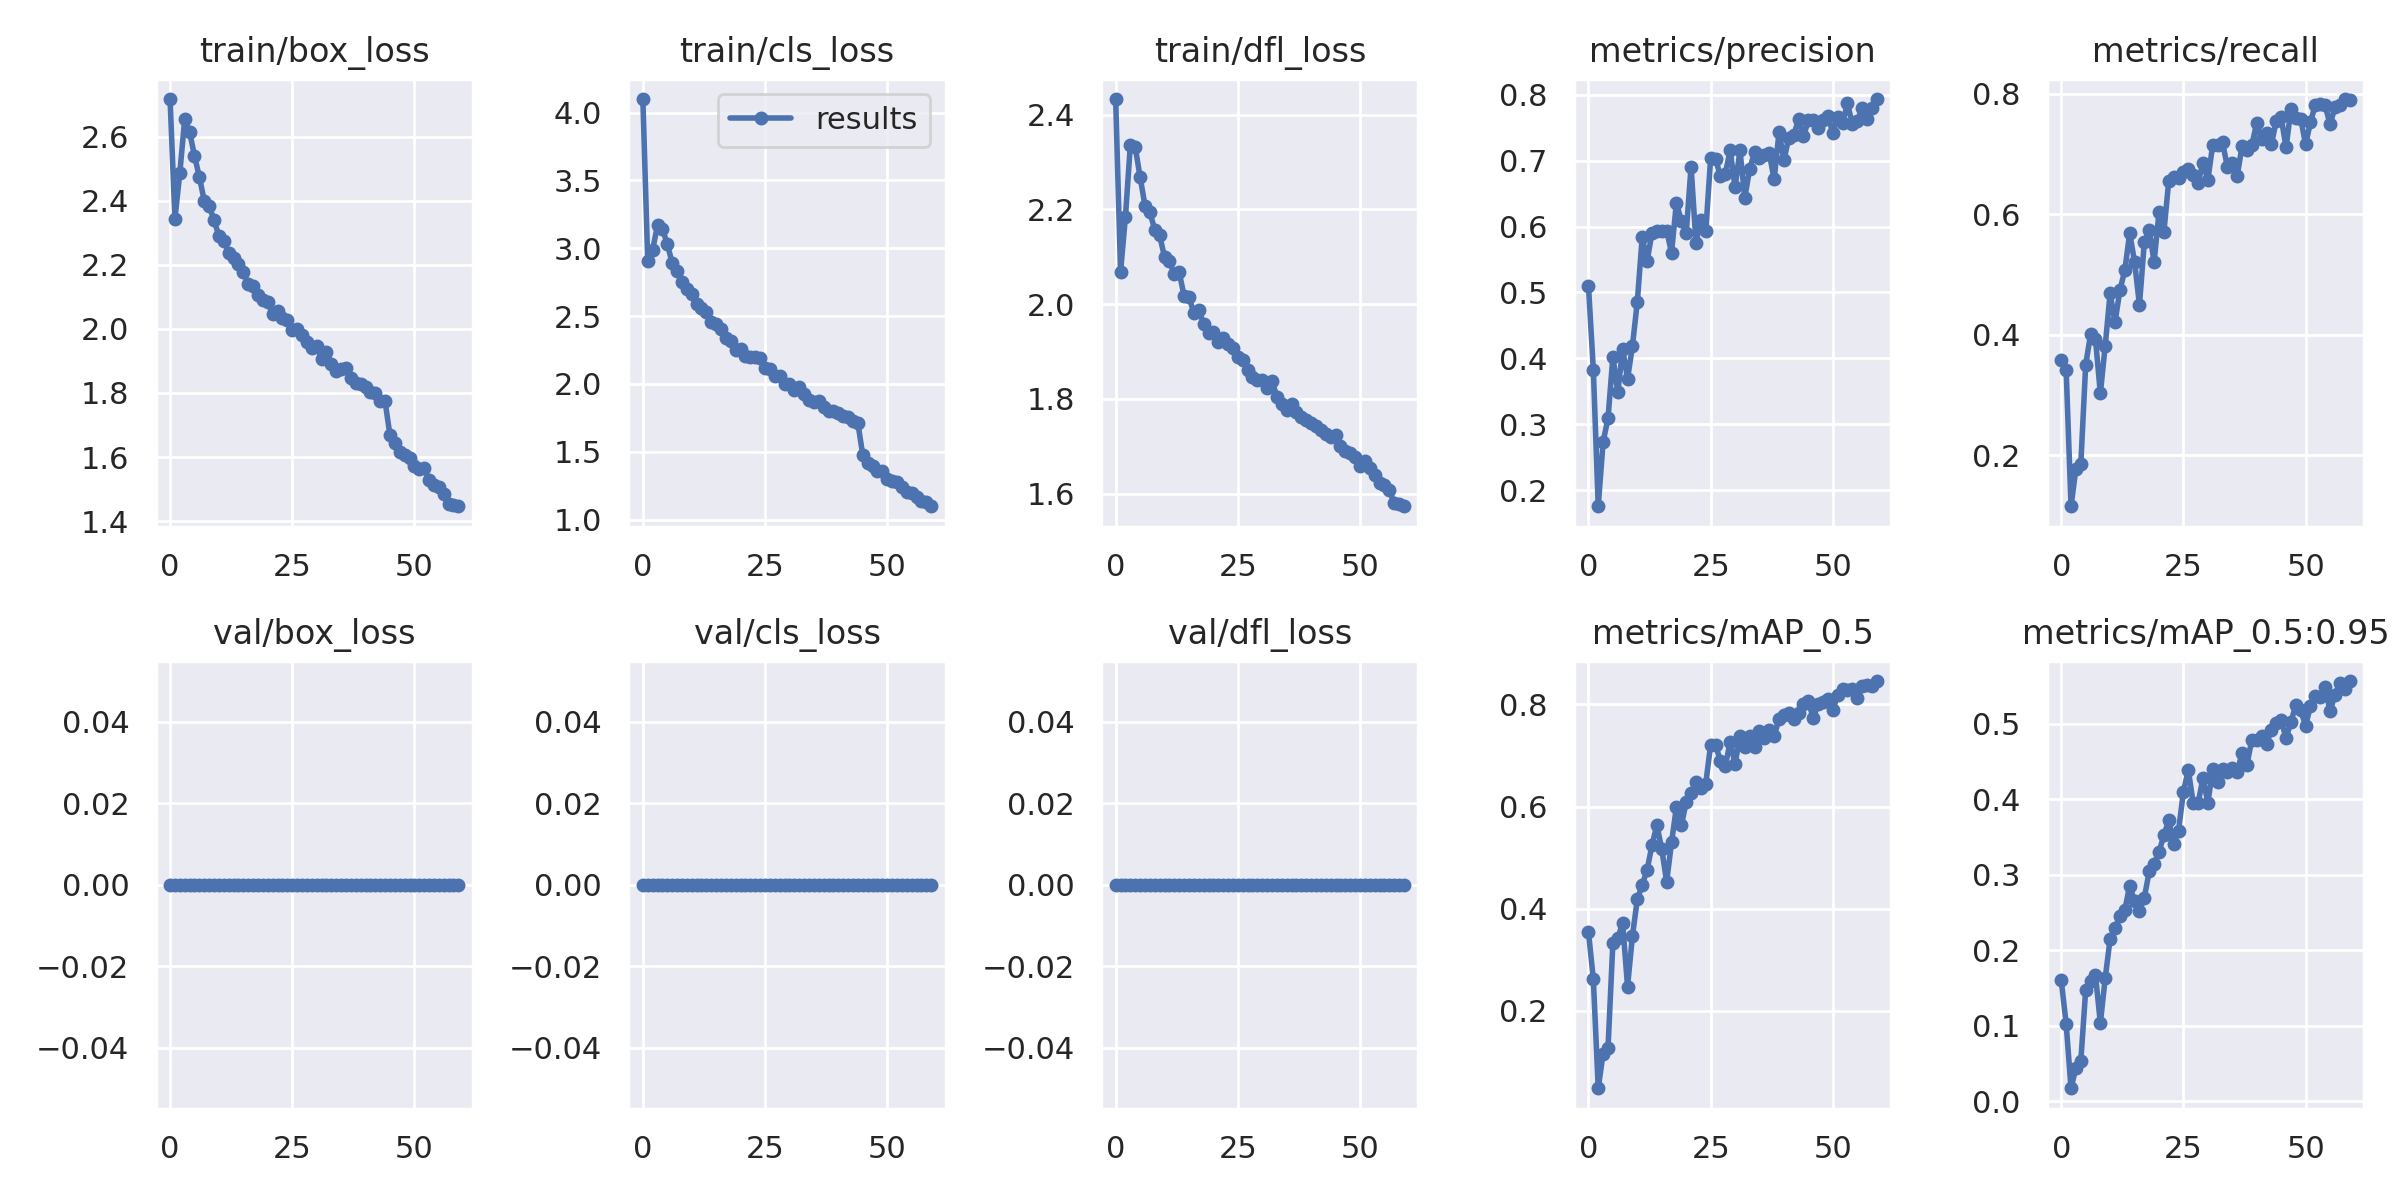

In [11]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp3/results.png", width=1000)

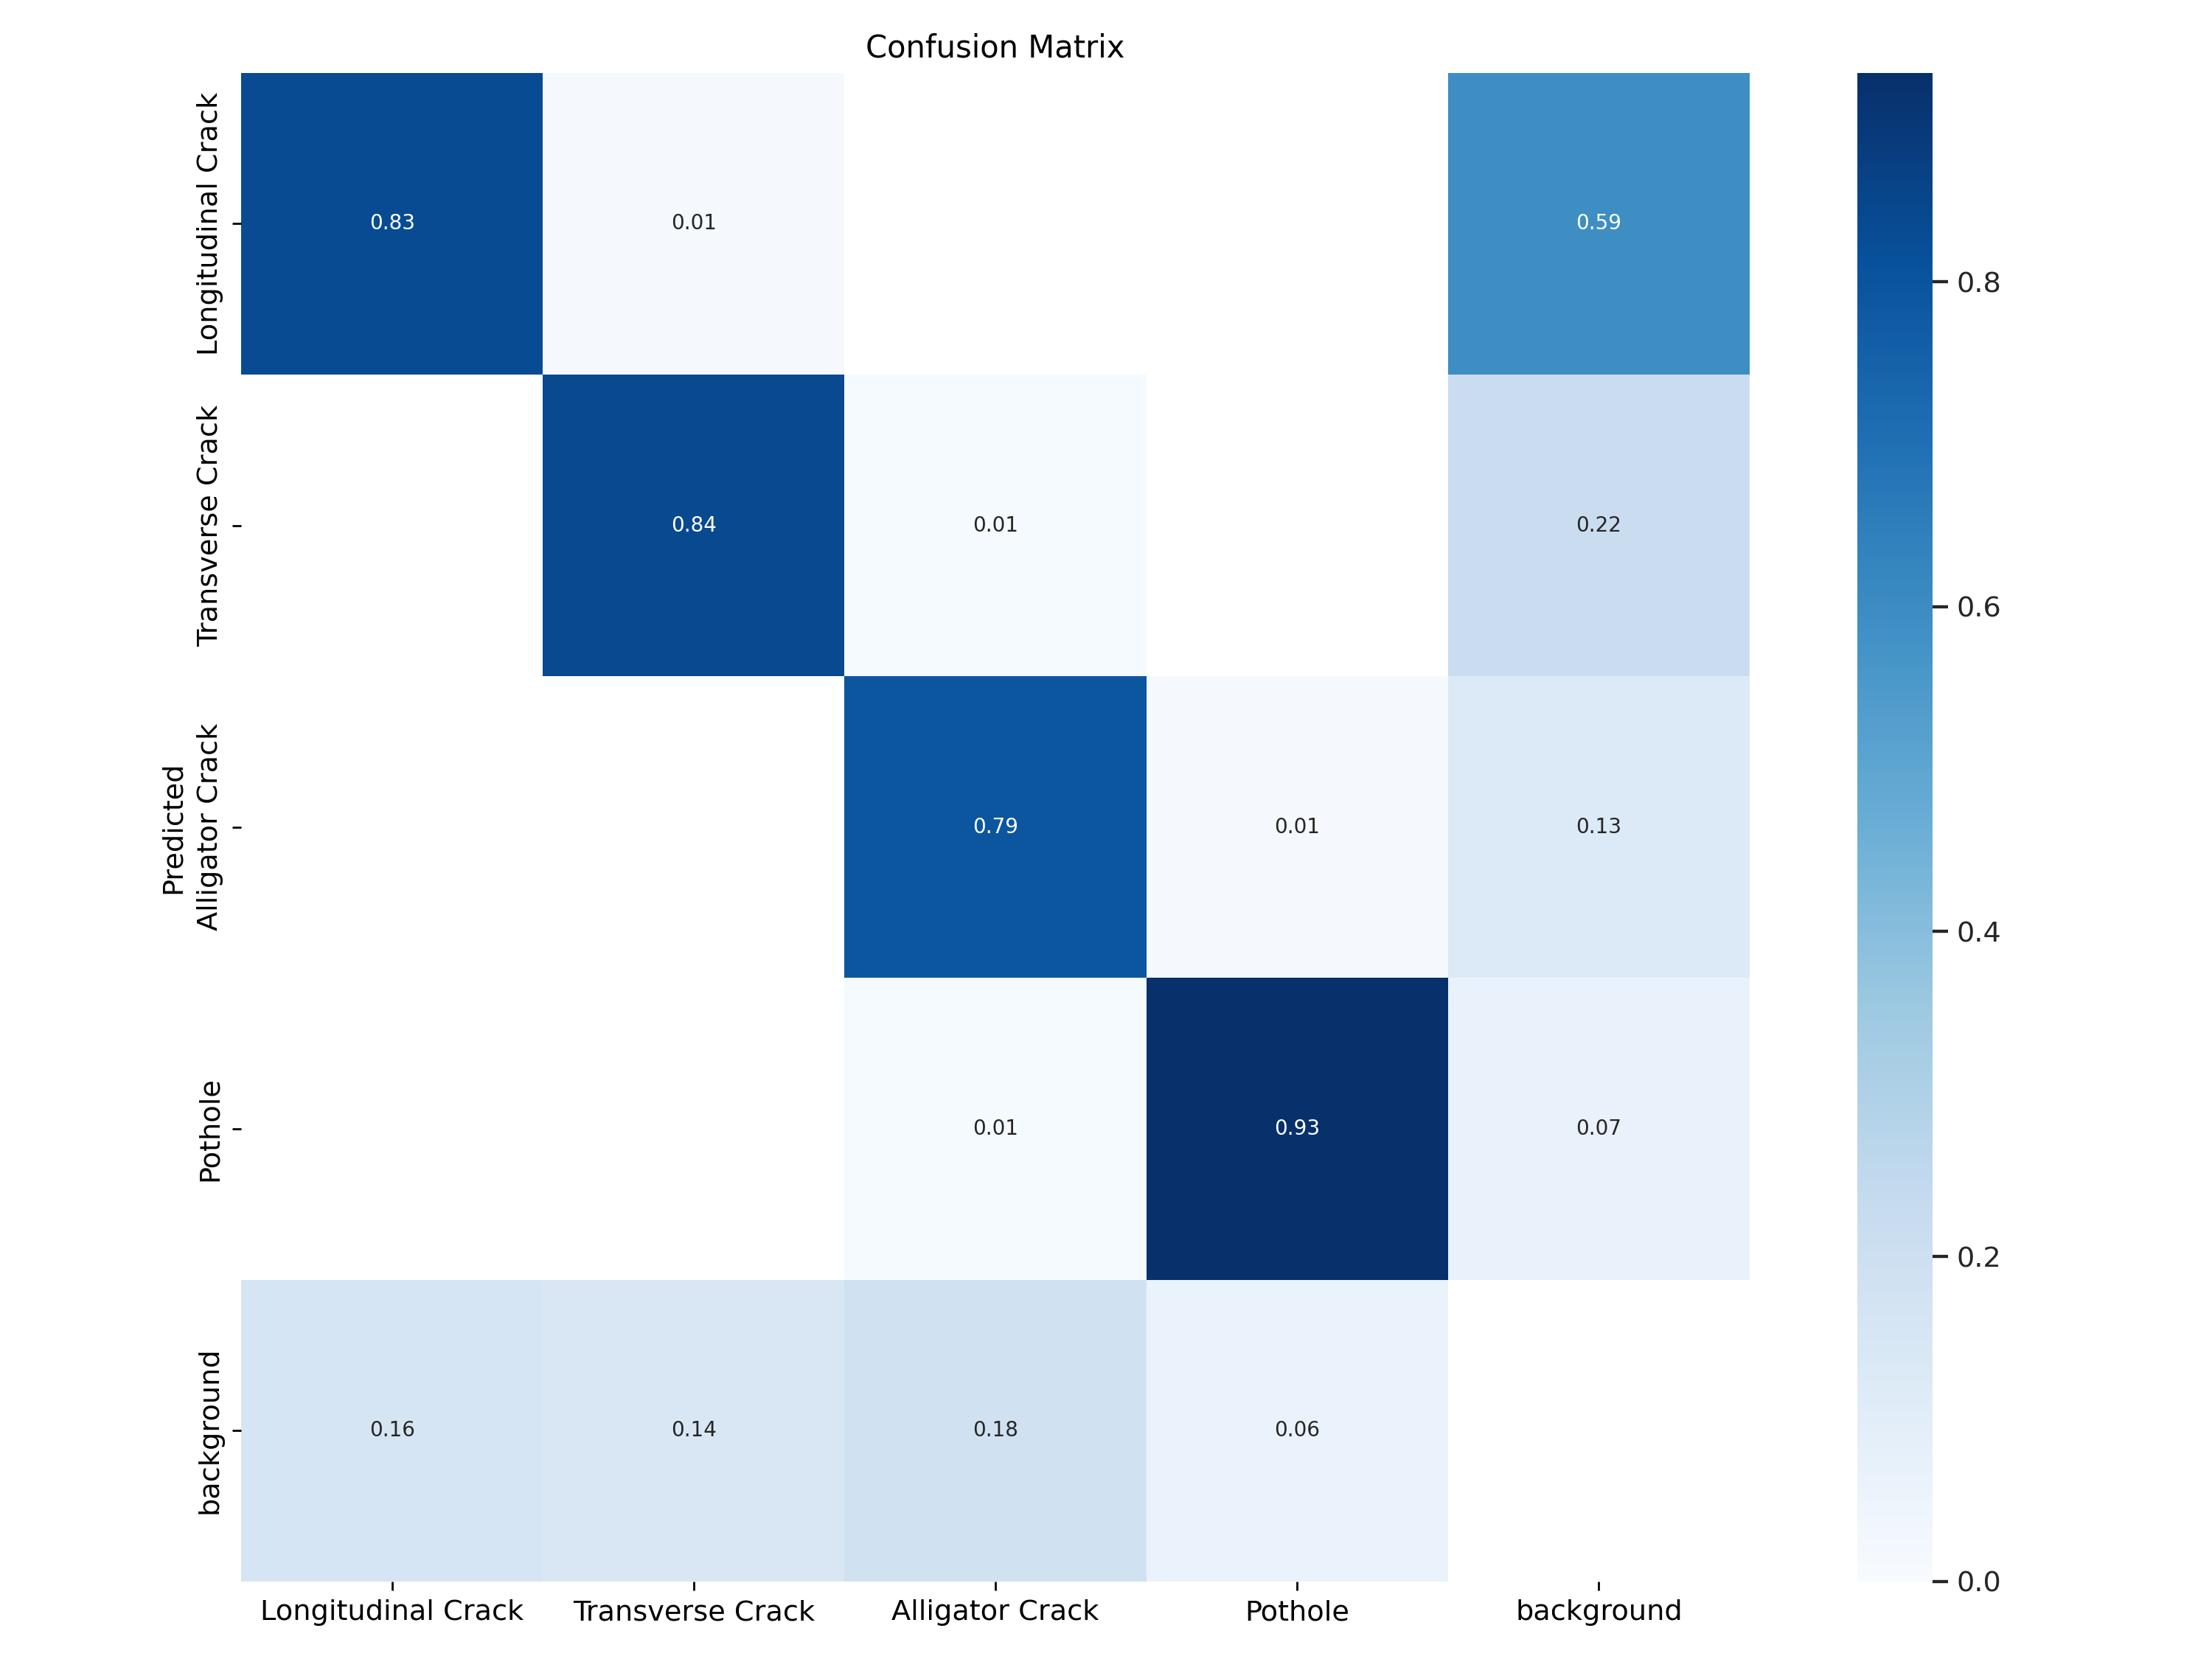

In [12]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp3/confusion_matrix.png", width=1000)

## Validate Custom Model


In [15]:
%cd {HOME}/yolov9

!python val_dual.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt

/home/YOLOv9-RDD/yolov9
val_dual: data=/home/YOLOv9-RDD/yolov9/rdd-5/data.yaml, weights=['/home/YOLOv9-RDD/yolov9/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.9 torch-2.4.0 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)

/home/YOLOv9-RDD/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` w

## Inference with Custom Model


In [16]:
!python detect_dual.py \
--img 640 --device 0 \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt \
--source {dataset.location}/test/images

detect_dual: weights=['/home/YOLOv9-RDD/yolov9/runs/train/exp3/weights/best.pt'], source=/home/YOLOv9-RDD/yolov9/rdd-5/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.9 torch-2.4.0 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)

/home/YOLOv9-RDD/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-model

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.


In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))

## BONUS: Deploy YOLOv9 Model with Inference


**NOTE:** To deploy the model and display inference results, we will need two additional packages - [`inference`](https://pypi.org/project/inference) and [`supervision`](https://pypi.org/project/supervision). Let's install and import them!


In [ ]:
!pip install -q inference supervision

In [ ]:
import cv2
import random
import getpass

import supervision as sv

from inference import get_model

%matplotlib inline

**NOTE:** Before using your model in Inference, you first need to upload your weights to Roboflow Universe. Ensure to specify the correct `model_type` - `yolov9`, and that the project version matches the version of the dataset you used for training, denoted by `[1]`. In my case, it's `6`.

![YOLOv9 Benchmark](https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/upload-roboflow-model.png)


In [ ]:
version.deploy(model_type="yolov9", model_path=f"{HOME}/yolov9/runs/train/exp4")

**NOTE:** Now we can download our model anywhere using the assigned `model_id` denoted by `[2]`. In my case `football-players-detection-3zvbc/6`. To download the model you will need your [`ROBOFLOW_API_KEY`](https://docs.roboflow.com/api-reference/authentication).


In [ ]:
ROBOFLOW_API_KEY = getpass.getpass()

model = get_model(model_id="football-players-detection-3zvbc/8", api_key=ROBOFLOW_API_KEY)

**NOTE:** Let's pick random image from our test subset and detect objects using newly fine-tuned model.


In [ ]:
image_paths = sv.list_files_with_extensions(
    directory=f"{dataset.location}/test/images",
    extensions=['png', 'jpg', 'jpeg']
)
image_path = random.choice(image_paths)
image = cv2.imread(image_path)

result = model.infer(image, confidence=0.1)[0]
detections = sv.Detections.from_inference(result)

**NOTE:** Finally, let's use supervision and [annotate](https://supervision.roboflow.com/develop/annotators/) our results.


In [ ]:
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
bounding_box_annotator = sv.BoundingBoxAnnotator()

annotated_image = image.copy()
annotated_image = bounding_box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)